In [1]:
import pandas as pd
import sklearn.tree as sktree
import scipy as sp
import os
path="./데이터/"
filename=os.listdir(path)

## 변수설정

### Target(Y)

target = 침수여부

In [55]:
target=pd.read_csv(f"{path}침수지역2022.csv")
target

,OBJECTID,GU_NAM,F_SHIM,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,...,TYPE,OBJECTID_1,OBJECTID_2,BASE_YEAR,ADM_CD_2,ADM_NM,Shape_Area,GU_CODE,GU_NAME,POP
0,275.0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.00,1130510400,20220808,20220808,18,...,주택,142,142.0,2016,1109074,우이동,1.058302e+07,11305,강북구,21497
1,223.0,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.00,1130510400,20220808,20220808,18,...,주택,142,142.0,2016,1109074,우이동,1.058302e+07,11305,강북구,21497
2,246.0,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.00,1130510400,20220808,20220808,18,...,주택,142,142.0,2016,1109074,우이동,1.058302e+07,11305,강북구,21497
3,4253.0,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.00,1156010400,20220808,20220810,20,...,상가,301,301.0,2016,1119074,영등포동,1.371591e+06,11560,영등포구,26964
4,301.0,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.00,1130510100,20220808,20220808,18,...,주택,139,139.0,2016,1109071,송중동,1.075003e+06,11305,강북구,29106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,42.0,용산구,0.10,2022년 8.8 ~17. 호우,14.38,151.71,1117013100,20220808,20220809,21,...,상가,45,45.0,2016,1103071,청파동,8.855684e+05,11170,용산구,20834
8883,59.0,용산구,0.10,2022년 8.8 ~17. 호우,56.60,74.09,1117010800,20220808,20220809,21,...,상가,48,48.0,2016,1103074,한남동,3.029615e+06,11170,용산구,23663
8884,45.0,용산구,0.10,2022년 8.8 ~17. 호우,17.31,190.53,1117011300,20220808,20220809,21,...,상가,36,36.0,2016,1103057,원효로2동,7.086393e+05,11170,용산구,14847
8885,116.0,성북구,0.10,2022년 8.8 ~17. 호우,84.05,33.97,1129010300,20220808,20220810,19,...,상가,128,128.0,2016,1108083,동선동,7.244096e+05,11290,성북구,16368


위의 데이터는 침수지역의 빈도(frequency)이므로 바꿔야함

In [3]:
print('한번이라도 침수가 일어난 지역수(행정동) :',target["ADM_NM"].nunique())

한번이라도 침수가 일어난 지역수(행정동) : 277


In [4]:
target["ADM_NM"]

0         우이동
1         우이동
2         우이동
3        영등포동
4         송중동
        ...  
8882      청파동
8883      한남동
8884    원효로2동
8885      동선동
8886    북가좌2동
Name: ADM_NM, Length: 8887, dtype: object

### Feature(X)

In [53]:
filename

['2022_강우량_관측소별',
 '2022년 침수흔적도_230717수정',
 'B422. 서울시 누적강수량(월평균) 공간데이터',
 'B422. 서울시 누적강수량(월평균) 공간데이터.zip.001',
 'data2.csv',
 'elevation.csv',
 'F_FAC_BUILDING_11_202311_수정.xlsx',
 'information_gain.csv',
 'LSMD_CONT_UQ123_서울',
 'mnum_data.csv',
 'ufid_data.csv',
 'Z_SIS_ASIT_SOILDRA_AREA.xlsx',
 '거리계산.xlsx',
 '건물.csv',
 '건축물데이터.csv',
 '경사도.xlsx',
 '고도',
 '공시지가_2019평균.csv',
 '공시지가_2019평균.xlsx',
 '공원(UTM).csv',
 '기초생활수급자+65세이상.csv',
 '기초수급자.csv',
 '노인.csv',
 '노인층.csv',
 '노후기간별+주택현황_20231114172801.csv',
 '녹지면적.csv',
 '단속실적.xlsx',
 '데이터',
 '도로 교차영역.csv',
 '도로 길이.csv',
 '도로 중복값제거.csv',
 '도로.csv',
 '도로_건물.csv',
 '도로현황(도로율)_20231015181102.csv',
 '동별_인구_고도_배수등급_공시지가.csv',
 '동별_인구_고도_배수등급_공시지가_결합.csv',
 '동별_인구_고도_배수등급_공시지가_결합_인코딩.csv',
 '모아보기.csv',
 '반출_행정동_소득가구_수정2차.xlsx',
 '배수등급양호비율.csv',
 '빗물펌프장_2030하수도정비기본계획_2015.xlsx',
 '서울시 상권분석서비스(소득소비-행정동)_20231101_서울열린데이터광장.csv',
 '서울시 행정동.csv',
 '서울시_강우량_정보_2021년',
 '서울시_강우량_정보_2022년',
 '서울시_행정동별_인구밀도_2023.csv',
 '서울특별시_양천구_빗물펌프장현황_20220925.csv',
 

In [6]:
경사도 = pd.read_excel(path + "/경사도.xlsx")
도로율 = pd.read_csv(path + "/" + "도로현황(도로율)_20231015181102.csv")
제방암거수문 = pd.read_csv(path + "/" + "제방암거수문_있다없다.csv")
# 행정동소득분위 = pd.read_excel(path + "/" + "반출_행정동_소득가구_수정2차.xlsx")
배수등급양호비율 = pd.read_csv(path + "/" + "배수등급양호비율.csv")
하천까지의거리 = pd.read_csv(path + "/" + "하천까지의_거리.csv")
인구밀도 = pd.read_csv(path + "/" + "서울시_행정동별_인구밀도_2023.csv")


사회인프라

In [7]:
장애인=pd.read_csv(path+"/"+"장애인.csv")
노인=pd.read_csv(path+"/"+'노인.csv')
기초수급자=pd.read_csv(path+"/"+"기초수급자.csv")
기초수급자_65세이상=pd.read_csv(path+"/"+'기초생활수급자+65세이상.csv')

강우량

In [8]:
path3=path+'서울시_강우량_정보_2022년/'

In [9]:
rain_dict={}
for i in range(1,13):
    rain_dict[i]=pd.read_csv(path3+f'서울시_강우량_정보_2022년{i}월.csv',encoding='euc-kr')

In [10]:
rain_data=pd.concat([rain_dict[i][rain_dict[i]["10분우량"]!=0] for i in range(1,13)])
rain_agg=rain_data.groupby(["구청명"])["10분우량"].agg(["sum","count"])
rain_agg.rename(columns=dict(zip(["sum","count"],["누적강수량","10분당 측정(횟수)"])),inplace=True)
rain_agg.index.rename(None,inplace=True)

In [11]:
rain_agg["추정시우량(연간)"]=rain_agg["누적강수량"]/(rain_agg["10분당 측정(횟수)"]/6)

In [12]:
rain_agg.index.rename("시군구",inplace=True)
rain_agg.reset_index(inplace=True)

In [13]:
구면적=pd.DataFrame(인구밀도.groupby(["구"])["면적 (k㎡)"].sum()).reset_index()
구면적.rename(columns={"구":"시군구"},inplace=True)

In [14]:
rain_agg=pd.merge(rain_agg,구면적)
rain_agg["추정면적당시우량(연간)"]=rain_agg["추정시우량(연간)"]/rain_agg["면적 (k㎡)"]

In [15]:
rain_agg

,시군구,누적강수량,10분당 측정(횟수),추정시우량(연간),면적 (k㎡),추정면적당시우량(연간)
0,강남구,5187.0,3025,10.288264,39.51,0.260396
1,강동구,3426.5,2300,8.938696,24.59,0.363509
2,강북구,1803.5,1382,7.829957,23.60,0.331778
3,강서구,2690.5,2053,7.863127,41.44,0.189747
4,관악구,3461.0,2176,9.543199,29.57,0.322732
5,광진구,1887.0,1353,8.368071,17.06,0.490508
6,구로구,3246.5,1962,9.928135,20.12,0.493446
7,금천구,3270.0,2091,9.383070,13.02,0.720666
8,노원구,3290.5,2312,8.539360,35.44,0.240953
9,도봉구,1932.0,1435,8.078049,20.65,0.391189


### 데이터 병합

행정동 단위
> 경사도, 행정공시지가, 배수등급양호비율, 하천까지의 거리, 제방수문암거

In [16]:
import PublicDataReader as pdr
행정동코드 = pdr.code_hdong()
import numpy as np
행정동=행정동코드[행정동코드["시도명"]=="서울특별시"][["시군구명","읍면동명"]]
행정동.index=행정동.index.astype('int')
행정동["시군구명"]=행정동["시군구명"].str.strip()
행정동["읍면동명"]=행정동["읍면동명"].str.strip()
행정동=행정동[행정동["시군구명"]!=""][행정동["읍면동명"]!=""]

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2023.10.30. 시행)


C:\Users\yis82\AppData\Local\Temp\ipykernel_25312\2488655424.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  행정동=행정동[행정동["시군구명"]!=""][행정동["읍면동명"]!=""]


----------

In [17]:
per_경사도=pd.DataFrame(경사도.groupby(["ADM_NM"])["경사도"].mean())
per_경사도.reset_index(inplace=True)

In [18]:
pre_경사도=pd.merge(경사도[["GU_NAME","ADM_NM"]],per_경사도,how='left')
pre_경사도["경사도(%)"]=pre_경사도["경사도"]*100
pre_경사도.drop_duplicates(["ADM_NM"],inplace=True)

In [19]:
pre_경사도

,GU_NAME,ADM_NM,경사도,경사도(%)
0,종로구,이화동,0.078333,7.833333
1,종로구,숭인2동,0.053125,5.312500
2,종로구,혜화동,0.078333,7.833333
3,중구,광희동,0.072500,7.250000
4,중구,을지로동,0.040000,4.000000
...,...,...,...,...
3234,관악구,난곡동,0.231667,23.166667
3427,금천구,시흥2동,0.377857,37.785714
3431,관악구,난향동,0.330000,33.000000
3464,금천구,독산2동,0.142667,14.266667


In [20]:
배수등급양호비율[["GU_NAME","ADM_NM","양호비율"]]

,GU_NAME,ADM_NM,양호비율
0,송파구,가락1동,0.654167
1,송파구,가락2동,0.842105
2,송파구,가락본동,0.680000
3,구로구,가리봉동,0.688073
4,금천구,가산동,0.610245
...,...,...,...
412,용산구,효창동,0.980769
413,용산구,후암동,1.000000
414,동대문구,휘경1동,0.405797
415,동대문구,휘경2동,0.300578


In [21]:
하천까지의거리[["GU_NAME","ADM_NM","HubDist"]]  

,GU_NAME,ADM_NM,HubDist
0,종로구,사직동,961.440982
1,종로구,삼청동,481.426072
2,종로구,부암동,719.095967
3,종로구,평창동,70.039725
4,종로구,무악동,1381.962564
...,...,...,...
419,강동구,둔촌1동,1112.581499
420,강동구,둔촌2동,286.658161
421,강동구,암사1동,1421.991249
422,강동구,천호2동,713.146580


In [22]:
제방암거수문
# 암거는 모두 가지고 있음

,GU_NAME,ADM_NM,비고,count,제방,수문,암거
0,강남구,개포1동,제방,65,1,1,1
1,강남구,개포1동,암거,58,1,1,1
2,강남구,개포1동,수문,4,1,1,1
3,강남구,개포2동,암거,95,1,1,1
4,강남구,개포2동,제방,30,1,1,1
...,...,...,...,...,...,...,...
833,중랑구,중화1동,암거,12,1,0,1
834,중랑구,중화1동,제방,4,1,0,1
835,중랑구,중화2동,암거,26,1,1,1
836,중랑구,중화2동,제방,12,1,1,1


In [23]:
인구밀도[["구","행정동","인구밀도(명/km²)"]]

,구,행정동,인구밀도(명/km²)
0,종로구,사직동,7618.699187
1,종로구,삼청동,1755.704698
2,종로구,부암동,4167.400881
3,종로구,평창동,2000.338219
4,종로구,무악동,22347.222220
...,...,...,...
421,강동구,둔촌1동,80.434783
422,강동구,둔촌2동,15520.512820
423,강동구,강일동,14638.053100
424,강동구,상일1동,21667.582420


In [24]:
# 행정동소득분위[["읍면동","1분위소득가구비율(%)","2분위소득가구비율(%)"
#          ,"3분위소득가구비율(%)","4분위소득가구비율(%)","5분위소득가구비율(%)"]]

In [25]:
행정동=pd.merge(배수등급양호비율[["GU_NAME","ADM_NM","양호비율"]]
             ,제방암거수문[["GU_NAME","ADM_NM","제방","수문"]],how="left")
행정동=pd.merge(행정동,pre_경사도,how='left')
행정동.drop("경사도",axis=1,inplace=True)
행정동.rename(columns={"양호비율":"배수등급양호비율","경사도(%)":"평균경사도(%)"},inplace=True)
행정동=pd.merge(행정동,하천까지의거리[["GU_NAME","ADM_NM","HubDist"]],how="left").rename(columns={"HubDist":"하천까지의거리(중심)"})
행정동=pd.merge(행정동,인구밀도[["구","행정동","인구밀도(명/km²)"]].rename(columns={"구":"GU_NAME","행정동":"ADM_NM"}),how="left")
# 행정동=pd.merge(행정동,행정동소득분위[["읍면동","1분위소득가구비율(%)","2분위소득가구비율(%)"
#          ,"3분위소득가구비율(%)","4분위소득가구비율(%)","5분위소득가구비율(%)"]].rename(columns=
#                                                                 {'읍면동':"ADM_NM"}),how='left')
# 행정동=pd.merge(행정동
#              ,행정공시지가[행정공시지가.columns[[0,1,-1]]].rename(
#                  columns=dict(zip(행정공시지가.columns[[0,1]],["GU_NAME","ADM_NM"]))),how="left")


In [26]:
len(행정동)

827

In [27]:
행정동.head()

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²)
0,송파구,가락1동,0.654167,1.0,0.0,3.812500,542.994437,20605.22388
1,송파구,가락1동,0.654167,1.0,0.0,3.812500,542.994437,20605.22388
2,송파구,가락2동,0.842105,0.0,0.0,7.125000,1074.589206,32888.54167
3,송파구,가락본동,0.680000,0.0,0.0,10.785714,2056.158356,22821.23894
4,구로구,가리봉동,0.688073,0.0,0.0,9.666667,1184.743571,31655.00000


In [28]:
행정동.isna().sum()

GU_NAME         0
ADM_NM          0
배수등급양호비율        0
제방              2
수문              2
평균경사도(%)        3
하천까지의거리(중심)     0
인구밀도(명/km²)    23
dtype: int64

Nan값 삭제

In [29]:
행정동.dropna(inplace=True)

--------

자치구별

In [30]:
행정동별_녹지면적 = pd.read_csv("./데이터/행정동별 녹지면적.csv")
행정동_면적 = pd.read_csv("./데이터/행정구역(동별)_20231115212741_열린데이터광장_2022.csv")
행정동별_녹지면적["행정동별_녹지면적(m²)"] = 행정동별_녹지면적["GREEN_AREA"] *1000

In [31]:
도로 = pd.read_csv("./데이터/행정동별_도로.csv")
건물 = pd.read_csv("./데이터/건물.csv")
도로길이 = pd.read_csv("./데이터/도로 길이.csv")
도로폭 = 도로.groupby("ADM_NM")[["ROAD_BT"]].mean()
# Selecting specific columns for each dataframe
건물 = 건물[["ADM_NM", "SHAPE_AREA"]]
도로 = pd.merge(도로폭, 도로길이, on="ADM_NM")

# Calculating ROAD_AREA by multiplying ROAD_BT and ROAD_LT
도로["ROAD_AREA"] = 도로["ROAD_BT"]  * 도로["LENGTH"] 
# Grouping by ADM_NM and summing the values for both 도로 and 건물
건물 = 건물.groupby("ADM_NM").sum()

# Merging the two dataframes on "ADM_NM"
도로_건물 = pd.merge(도로, 건물, on="ADM_NM")

# Adding a new column "도로_건물_면적" by summing ROAD_AREA and SHAPE_AREA
도로_건물["도로_건물_면적"] = 도로_건물["ROAD_AREA"] + 도로_건물["SHAPE_AREA"]
도로_건물["도로_건물_면적_m²"] = 도로_건물["도로_건물_면적"]

In [32]:
행정동_면적 = pd.read_csv("./데이터/행정구역(동별)_20231115212741_열린데이터광장_2022.csv")
행정동_면적 = 행정동_면적[["동별(3)", "2022"]].iloc[4:, :].reset_index()
행정동_면적.rename(columns={"동별(3)": "ADM_NM", "2022": "AREA(㎡)"}, inplace=True)
행정동_면적.drop(columns="index", inplace=True)

In [33]:
행정동별_불투수면_비율 = pd.DataFrame(
    {
        "ADM_NM": 행정동_면적["ADM_NM"],
        "AREA": 행정동_면적["AREA(㎡)"],
        "도로_건물_면적_m²": 도로_건물["도로_건물_면적_m²"],
        "GREEN_AREA(㎡)": 행정동별_녹지면적["행정동별_녹지면적(m²)"],
    }
)

In [34]:
장애인[["동별(2)","장애인_per"]]

,동별(2),장애인_per
0,종로구,0.042206
1,중구,0.047262
2,용산구,0.035601
3,성동구,0.040202
4,광진구,0.036498
5,동대문구,0.046458
6,중랑구,0.053083
7,성북구,0.040730
8,강북구,0.059247
9,도봉구,0.049010


In [35]:
시군구=pd.merge(도로율[["자치구별(2)","2022.2"]].loc[2:].rename(columns=dict(zip(["자치구별(2)","2022.2"],["동별(2)","도로율"])))
             ,노인[["동별(2)","노인_per"]])
시군구=pd.merge(시군구,장애인[["동별(2)","장애인_per"]])
시군구=pd.merge(시군구,기초수급자_65세이상[["자치구별(2)","per(기초생활수급자)",'per(기초생활수급자+65세이상)']].rename(
    columns=dict(zip(["자치구별(2)","per(기초생활수급자)",'per(기초생활수급자+65세이상)']
                     ,["동별(2)","기초생활수급자_per",'기초생활수급자+65세이상_per']))
))
시군구=pd.merge(시군구,rain_agg[["시군구","추정면적당시우량(연간)"]].rename(columns={"시군구":"동별(2)"}))
시군구[[y for y in 시군구.columns if "per" in y]]=시군구[[y for y in 시군구.columns if "per" in y]].applymap(lambda x:x*100)
시군구["도로율"]=시군구["도로율"].astype("float")

In [36]:
시군구

,동별(2),도로율,노인_per,장애인_per,기초생활수급자_per,기초생활수급자+65세이상_per,추정면적당시우량(연간)
0,종로구,21.15,18.448941,4.220620,3.508514,1.578096,0.328817
1,중구,18.86,18.991788,4.726233,4.810223,2.285956,0.840333
2,용산구,23.44,16.564249,3.560130,3.952176,1.560540,0.377053
3,성동구,24.26,15.607165,4.020165,3.540936,1.468996,0.487454
4,광진구,29.13,14.672661,3.649844,3.890369,1.232481,0.490508
5,동대문구,22.74,18.002722,4.645774,4.781744,2.017811,0.590796
6,중랑구,25.60,17.924199,5.308269,6.875538,2.518254,0.452225
7,성북구,23.18,16.875989,4.072977,3.819461,1.485008,0.332156
8,강북구,17.77,20.898984,5.924687,7.236783,2.841112,0.331778
9,도봉구,23.93,19.557262,4.901019,4.748344,1.690083,0.391189


In [37]:
행정동['배수등급양호비율'].min()

0.0061728395061728

In [38]:
통합=pd.merge(행정동,시군구.rename(columns={"동별(2)":"GU_NAME"}),how="left")

In [39]:
침수여부=pd.DataFrame(target["ADM_NM"].unique(),columns=["ADM_NM"])
침수여부["침수여부"]=1
통합=pd.merge(통합,침수여부,how="left")
통합.isna().sum() # Nan값 확인

GU_NAME                0
ADM_NM                 0
배수등급양호비율               0
제방                     0
수문                     0
평균경사도(%)               0
하천까지의거리(중심)            0
인구밀도(명/km²)            0
도로율                    0
노인_per                 0
장애인_per                0
기초생활수급자_per            0
기초생활수급자+65세이상_per      0
추정면적당시우량(연간)           0
침수여부                 269
dtype: int64

In [40]:
# Nan값 -> 0 으로 쳐리하면 침수여부(0값)이 침수가 일어나지 않은 데이터로 바뀜
통합=통합.fillna(0)

In [41]:
통합.dropna(axis=0,inplace=True)

In [42]:
통합.drop_duplicates("ADM_NM",inplace=True)

----------

In [43]:
통합

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),도로율,노인_per,장애인_per,기초생활수급자_per,기초생활수급자+65세이상_per,추정면적당시우량(연간),침수여부
0,송파구,가락1동,0.654167,1.0,0.0,3.812500,542.994437,20605.22388,20.14,14.259492,3.117333,2.653057,0.920666,0.285946,1.0
2,송파구,가락2동,0.842105,0.0,0.0,7.125000,1074.589206,32888.54167,20.14,14.259492,3.117333,2.653057,0.920666,0.285946,1.0
3,송파구,가락본동,0.680000,0.0,0.0,10.785714,2056.158356,22821.23894,20.14,14.259492,3.117333,2.653057,0.920666,0.285946,1.0
4,구로구,가리봉동,0.688073,0.0,0.0,9.666667,1184.743571,31655.00000,21.55,17.483236,4.669164,3.372114,1.338061,0.493446,1.0
5,금천구,가산동,0.610245,1.0,0.0,8.772727,468.909180,10567.85714,22.37,17.127026,5.017209,5.388524,2.088480,0.720666,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,용산구,효창동,0.980769,1.0,0.0,12.666667,3363.536779,24777.27273,23.44,16.564249,3.560130,3.952176,1.560540,0.377053,0.0
791,용산구,후암동,1.000000,1.0,0.0,39.625000,346.532474,19465.11628,23.44,16.564249,3.560130,3.952176,1.560540,0.377053,0.0
793,동대문구,휘경1동,0.405797,1.0,0.0,5.800000,754.989114,25936.50794,22.74,18.002722,4.645774,4.781744,2.017811,0.590796,0.0
795,동대문구,휘경2동,0.300578,1.0,1.0,5.583333,640.702435,24180.95238,22.74,18.002722,4.645774,4.781744,2.017811,0.590796,0.0


In [44]:
빗물펌프장_거리 = pd.read_excel(r"./데이터/거리계산.xlsx")
빗물펌프장_거리.rename(
    columns=dict(zip(빗물펌프장_거리.columns, ["ADM_NM", "펌프장", "빗물펌프장까지의거리(m)"])),
    inplace=True,
)
빗물펌프장_거리

,ADM_NM,펌프장,빗물펌프장까지의거리(m)
0,사직동,용산,5019.271351
1,사직동,원효,4786.778475
2,사직동,한남,6314.995811
3,사직동,심원,5044.176430
4,사직동,보광,6390.426897
...,...,...,...
49411,상일2동,몽촌2,6685.518464
49412,상일2동,탄천,7965.065712
49413,상일2동,천호,4851.592920
49414,상일2동,성내,5831.572966


In [45]:
펌프장 = pd.DataFrame(빗물펌프장_거리.groupby(["ADM_NM"])["빗물펌프장까지의거리(m)"].min()).reset_index()
펌프장

,ADM_NM,빗물펌프장까지의거리(m)
0,가락1동,1336.451802
1,가락2동,646.717524
2,가락본동,358.128508
3,가리봉동,1007.478249
4,가산동,466.990492
...,...,...
420,효창동,1284.697842
421,후암동,1819.097470
422,휘경1동,357.712372
423,휘경2동,300.317946


In [46]:
소득소비 = pd.read_csv(
    "./데이터/서울시 상권분석서비스(소득소비-행정동)_20231101_서울열린데이터광장.csv", encoding="euc-kr"
)
소득소비.rename(columns={"행정동_코드_명": "ADM_NM"}, inplace=True)
# 월평균소득,지출은 2022년 평균으로 구함
i1 = 소득소비["기준_년분기_코드"] == 20221
i2 = 소득소비["기준_년분기_코드"] == 20222
i3 = 소득소비["기준_년분기_코드"] == 20223
i4 = 소득소비["기준_년분기_코드"] == 20224
소득소비 = pd.DataFrame(
    소득소비[i1 | i2 | i3 | i4].groupby("ADM_NM")[["월_평균_소득_금액", "지출_총금액"]].sum()
).reset_index()
소득소비[["월_평균_소득_금액"]] = 소득소비[["월_평균_소득_금액"]].applymap(lambda x: x / 4)

In [47]:
행정동별_불투수면_비율["도로_건물_면적_비율"] = 행정동별_불투수면_비율["도로_건물_면적_m²"].astype(float) / 행정동별_불투수면_비율[
    "AREA"
].astype(float)
행정동별_불투수면_비율["녹지_면적_비율"] = 행정동별_불투수면_비율["GREEN_AREA(㎡)"].astype(float) / 행정동별_불투수면_비율[
    "AREA"
].astype(float)

In [48]:
통합 = pd.merge(통합,행정동별_불투수면_비율)

In [49]:
y_data = pd.read_csv("./데이터/침수지역2022.csv")
y =y_data['ADM_NM']

frequency = pd.DataFrame({"FREQUENCY":y.value_counts()})
frequency.reset_index(inplace=True)

In [50]:
data = pd.merge(통합,frequency,on="ADM_NM")

In [51]:
data.sort_values(by = 'FREQUENCY', ascending = False)

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),도로율,노인_per,...,기초생활수급자_per,기초생활수급자+65세이상_per,추정면적당시우량(연간),침수여부,AREA,도로_건물_면적_m²,GREEN_AREA(㎡),도로_건물_면적_비율,녹지_면적_비율,FREQUENCY
43,영등포구,대림2동,0.174699,1.0,0.0,5.250000,219.020685,31967.272730,29.23,15.888026,...,3.044485,1.321272,0.355214,1.0,550000,248534.488219,56535.108616,0.451881,0.102791,880
42,영등포구,대림1동,0.694118,0.0,0.0,8.000000,706.587694,33404.081630,29.23,15.888026,...,3.044485,1.321272,0.355214,1.0,490000,458857.568230,25456.467876,0.936444,0.051952,527
162,영등포구,신길6동,0.500000,0.0,0.0,9.750000,1381.548300,29955.384620,29.23,15.888026,...,3.044485,1.321272,0.355214,1.0,650000,282295.601467,3585.535219,0.434301,0.005516,397
161,영등포구,신길5동,0.745763,0.0,0.0,4.125000,1171.471122,23687.234040,29.23,15.888026,...,3.044485,1.321272,0.355214,1.0,470000,411467.913195,157821.963209,0.875464,0.335791,362
106,동작구,사당1동,0.266272,0.0,0.0,11.944444,1126.751160,29151.898730,19.48,16.704644,...,3.354643,1.377627,0.547009,1.0,790000,414481.236830,312241.298910,0.524660,0.395242,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,양천구,목4동,0.888060,0.0,0.0,10.500000,2212.488248,43526.315790,27.55,14.776724,...,3.854184,1.471109,0.475653,1.0,570000,381109.496615,351756.679991,0.668613,0.617117,1
199,송파구,오륜동,0.561905,1.0,1.0,11.603448,104.977094,5605.362776,20.14,14.259492,...,2.653057,0.920666,0.285946,1.0,3170000,375532.069922,237733.062025,0.118464,0.074995,1
75,중랑구,묵1동,0.574297,1.0,1.0,15.111111,1498.589679,28514.166670,25.60,17.924199,...,6.875538,2.518254,0.452225,1.0,1200000,583106.680514,43920.979175,0.485922,0.036601,1
76,중랑구,묵2동,0.286713,1.0,0.0,4.714286,162.293510,27840.298510,25.60,17.924199,...,6.875538,2.518254,0.452225,1.0,670000,253798.734046,36577.278759,0.378804,0.054593,1


In [52]:
data['cluster'] =df_pca_kmeans['Segment K-means PCA']

NameError: name 'df_pca_kmeans' is not defined

In [ ]:
data.loc[data['cluster'] == 0]

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),도로율,노인_per,...,기초생활수급자+65세이상_per,추정면적당시우량(연간),침수여부,AREA,도로_건물_면적_m²,GREEN_AREA(㎡),도로_건물_면적_비율,녹지_면적_비율,FREQUENCY,cluster
9,구로구,개봉2동,0.298969,1.0,1.0,15.142857,706.886026,38138.750000,21.55,17.483236,...,1.338061,0.493446,1.0,800000,477234.375973,94087.587692,0.596543,0.117609,61,0.0
10,구로구,개봉3동,0.533981,1.0,1.0,11.642857,126.927890,24958.024690,21.55,17.483236,...,1.338061,0.493446,1.0,810000,761760.919134,90826.276321,0.940446,0.112131,42,0.0
11,강남구,개포1동,0.705394,1.0,1.0,13.794118,2630.040525,5442.519685,22.18,14.085850,...,1.153605,0.260396,1.0,1270000,383811.888380,420712.134332,0.302214,0.331269,16,0.0
12,강남구,개포4동,0.837920,1.0,1.0,15.911765,2066.530280,15848.322150,22.18,14.085850,...,1.153605,0.260396,1.0,1490000,142939.039911,137779.559880,0.095932,0.092470,35,0.0
13,송파구,거여1동,0.542857,1.0,1.0,8.400000,575.563829,24039.215690,20.14,14.259492,...,0.920666,0.285946,1.0,510000,378245.646280,400012.045747,0.741658,0.784337,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,성북구,장위1동,0.735294,0.0,0.0,18.250000,313.307955,34294.285710,23.18,16.875989,...,1.485008,0.332156,1.0,700000,602786.323104,229646.719176,0.861123,0.328067,2,0.0
230,성북구,정릉3동,1.000000,1.0,1.0,40.700000,191.495016,4484.636119,23.18,16.875989,...,1.485008,0.332156,1.0,3710000,393614.338110,131858.562284,0.106096,0.035541,6,0.0
233,성북구,종암동,0.051724,1.0,1.0,15.611111,574.422434,27431.506850,23.18,16.875989,...,1.485008,0.332156,1.0,1460000,276065.522862,41676.453695,0.189086,0.028546,3,0.0
235,관악구,중앙동,0.913043,0.0,0.0,12.250000,1792.455192,40479.487180,19.27,15.983337,...,1.742469,0.322732,1.0,390000,517086.016481,263195.609792,1.325862,0.674861,27,0.0


In [ ]:
sum([0.025, 0.145, 0.039, 0.103, 0.079, 0.080, 0.071, 0.076, 0.121, 0.136, 0.157, 0.073, 0.014, 0.139, 0.026])

1.284

### 주요 성분 분석

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold, cross_validate
import seaborn as sb
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans



In [ ]:
x = data.drop(["GU_NAME","ADM_NM","침수여부","FREQUENCY",'기초생활수급자+65세이상_per'],axis=1)
y = data['FREQUENCY']
x.shape, y.shape

((266, 16), (266,))

In [ ]:
df =  data.drop(["GU_NAME","ADM_NM","침수여부","기초생활수급자+65세이상_per"],axis=1)

In [ ]:
df

,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),도로율,노인_per,장애인_per,기초생활수급자_per,추정면적당시우량(연간),AREA,도로_건물_면적_m²,GREEN_AREA(㎡),도로_건물_면적_비율,녹지_면적_비율,FREQUENCY
0,0.654167,1.0,0.0,3.812500,542.994437,20605.223880,20.14,14.259492,3.117333,2.653057,0.285946,1340000,403071.180885,1.361365e+05,0.300799,0.101594,2
1,0.842105,0.0,0.0,7.125000,1074.589206,32888.541670,20.14,14.259492,3.117333,2.653057,0.285946,960000,197998.648237,2.834565e+05,0.206249,0.295267,11
2,0.680000,0.0,0.0,10.785714,2056.158356,22821.238940,20.14,14.259492,3.117333,2.653057,0.285946,1130000,242414.841046,2.545397e+05,0.214526,0.225256,15
3,0.688073,0.0,0.0,9.666667,1184.743571,31655.000000,21.55,17.483236,4.669164,3.372114,0.493446,400000,615575.084745,2.348406e+03,1.538938,0.005871,19
4,0.610245,1.0,0.0,8.772727,468.909180,10567.857140,22.37,17.127026,5.017209,5.388524,0.720666,2520000,318948.961569,4.978646e+04,0.126567,0.019757,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.927681,1.0,0.0,16.866667,753.698775,14307.766990,17.46,17.205958,4.073199,3.748701,0.420717,2060000,407221.375463,1.401096e+05,0.197680,0.068014,6
262,0.206349,1.0,0.0,4.000000,561.032696,41493.939390,18.86,18.991788,4.726233,4.810223,0.840333,330000,706946.143438,1.330024e+06,2.142261,4.030375,1
263,0.935484,1.0,0.0,38.000000,1080.986380,17997.368420,22.74,18.002722,4.645774,4.781744,0.590796,760000,317175.105559,9.892787e+04,0.417336,0.130168,2
264,0.826733,1.0,0.0,19.875000,745.755148,6141.666667,18.86,18.991788,4.726233,4.810223,0.840333,840000,257679.503045,6.507053e+04,0.306761,0.077465,1


#### 독립변수 MinMax 스케일링

In [ ]:
MinMaxScaler=MinMaxScaler()
scale_df= MinMaxScaler.fit_transform(df)

In [ ]:
sca_df = pd.DataFrame(data=scale_df, columns=df.columns)

In [ ]:
sca_df=sca_df.dropna()

In [ ]:
sca_df

,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),도로율,노인_per,장애인_per,기초생활수급자_per,추정면적당시우량(연간),AREA,도로_건물_면적_m²,GREEN_AREA(㎡),도로_건물_면적_비율,녹지_면적_비율,FREQUENCY
0,0.652019,1.0,0.0,0.082400,0.153404,0.412559,0.227698,0.025486,0.167128,0.162254,0.147864,0.089157,0.115091,0.029934,0.079469,0.025123,0.001138
1,0.841125,0.0,0.0,0.164801,0.304146,0.659459,0.227698,0.025486,0.167128,0.162254,0.147864,0.058635,0.042264,0.062679,0.053593,0.073181,0.011377
2,0.678012,0.0,0.0,0.255864,0.582485,0.457102,0.227698,0.025486,0.167128,0.162254,0.147864,0.072289,0.058037,0.056252,0.055858,0.055809,0.015927
3,0.686136,0.0,0.0,0.228027,0.335382,0.634665,0.347494,0.498653,0.627517,0.293673,0.466808,0.013655,0.190557,0.000196,0.418316,0.001371,0.020478
4,0.607824,1.0,0.0,0.205789,0.132396,0.210802,0.417162,0.446370,0.730774,0.662202,0.816063,0.183936,0.085217,0.010740,0.031786,0.004816,0.062571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.927232,1.0,0.0,0.407131,0.213153,0.285977,0.000000,0.457955,0.450709,0.362500,0.355019,0.146988,0.116565,0.030817,0.051248,0.016791,0.005688
262,0.201420,1.0,0.0,0.087065,0.158519,0.832432,0.118946,0.720071,0.644448,0.556509,1.000000,0.008032,0.223005,0.295306,0.583430,1.000000,0.000000
263,0.935083,1.0,0.0,0.932836,0.305960,0.360139,0.448598,0.574900,0.620578,0.551304,0.616442,0.042570,0.084587,0.021663,0.111362,0.032214,0.001138
264,0.825656,1.0,0.0,0.481965,0.210900,0.121834,0.118946,0.720071,0.644448,0.556509,1.000000,0.048996,0.063458,0.014138,0.081101,0.019136,0.000000


In [ ]:
pca = PCA()
pca.fit_transform(sca_df)

array([[-0.08397289,  0.34436824, -0.53333166, ...,  0.01255728,
         0.00530042, -0.00645047],
       [-0.83166584,  0.3300831 ,  0.17865098, ...,  0.01996871,
        -0.0077062 , -0.01878144],
       [-0.84343951,  0.37382969,  0.20822426, ...,  0.01944926,
         0.02904914, -0.00625276],
       ...,
       [ 0.11218765, -0.44680042, -0.25950026, ..., -0.00708875,
         0.02039856,  0.0039726 ],
       [ 0.15962815, -0.6799053 , -0.26829566, ..., -0.04707752,
        -0.00426405,  0.01856947],
       [-0.69387782, -0.07647612,  0.27708139, ...,  0.0086138 ,
         0.00153034, -0.0087785 ]])

In [ ]:
pca.explained_variance_ratio_

array([0.31743827, 0.20260907, 0.12882466, 0.08574499, 0.06893022,
       0.0454898 , 0.03570562, 0.02524629, 0.02032179, 0.01949534,
       0.01599472, 0.01082894, 0.00935943, 0.0074192 , 0.00315469,
       0.00219878, 0.00123818])

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
len(cumsum)

17

In [ ]:
pca_2 = PCA(n_components=6)
pca_2.fit(sca_df)

PCA(n_components=6)

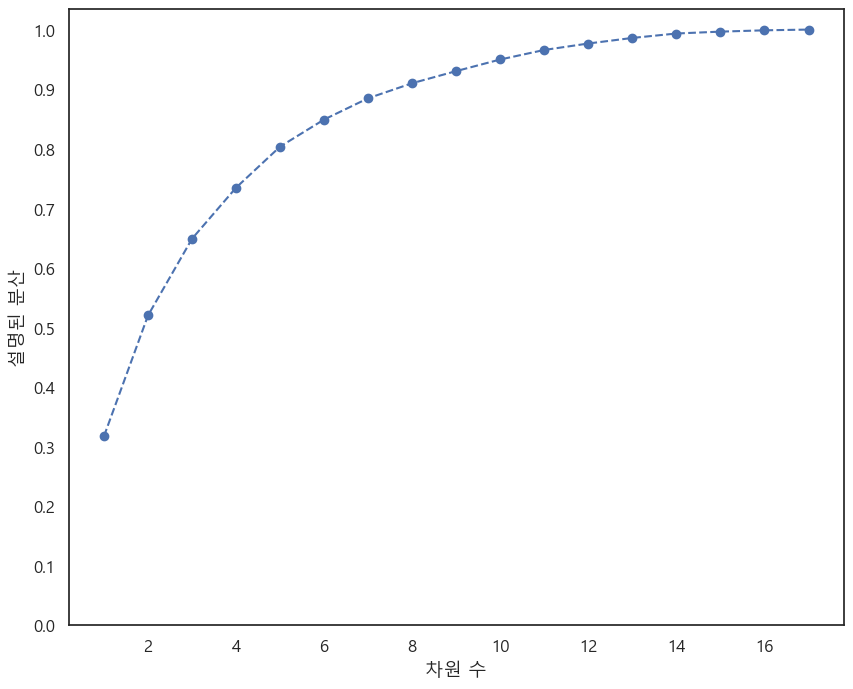

In [ ]:
import platform

plt.figure(figsize=(10, 8))

plt.plot(
    range(1, 18), pca.explained_variance_ratio_.cumsum(), marker="o", linestyle="--"
)
plt.yticks([i / 10 for i in range(11)])
plt.ylabel("설명된 분산")


plt.xlabel("차원 수")
plt.yticks

plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False  # 한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [ ]:
print ('Cumulative variance explained by 2 principal components: {:.6%}'.format(np.sum(pca_2.explained_variance_ratio_)))


Cumulative variance explained by 2 principal components: 84.903701%


In [ ]:
pca_2_result = pca_2.fit_transform(sca_df)

In [ ]:
results = pd.DataFrame(data=  pca_2.fit_transform(sca_df), columns=['PC-1','PC-2',"PC-3","PC-4","PC-5","PC-6"])

In [ ]:
# 결과 출력
components_df = pd.DataFrame(pca_2.components_, columns=sca_df.columns,
                              index=results.columns)
components_df

,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),도로율,노인_per,장애인_per,기초생활수급자_per,추정면적당시우량(연간),AREA,도로_건물_면적_m²,GREEN_AREA(㎡),도로_건물_면적_비율,녹지_면적_비율,FREQUENCY
PC-1,0.014573,0.684474,0.633267,0.064071,-0.179353,-0.163935,-0.028866,0.134042,0.132841,0.130567,-0.033403,0.097629,0.012498,0.001469,-0.040741,-0.013220,-0.031201
PC-2,-0.065608,-0.017346,0.319531,-0.077345,0.073497,-0.090593,0.328006,-0.509945,-0.474730,-0.459320,-0.250475,0.055339,-0.008040,-0.011783,-0.040240,-0.030499,0.034266
PC-3,0.004747,-0.667768,0.676628,0.118616,0.117599,0.067841,-0.117492,0.090756,0.122452,0.152813,0.041056,0.023131,-0.016327,-0.015196,-0.008624,-0.023581,-0.000917
PC-4,-0.590388,0.000274,0.058062,-0.394831,-0.006281,0.223696,0.576315,0.086783,0.219013,0.180417,0.086591,-0.088854,-0.014540,-0.019002,0.024586,0.008658,0.072572
PC-5,-0.376249,0.087230,0.118697,-0.296048,-0.131907,0.336904,-0.636937,-0.038721,-0.206972,-0.246608,0.186422,-0.197532,0.062313,-0.010530,0.156517,0.070692,0.009371
PC-6,-0.362154,-0.076196,-0.049457,0.091409,0.019094,-0.614657,-0.049499,0.025905,-0.071633,-0.138454,0.599134,0.218533,-0.055511,-0.040306,-0.165413,-0.088361,0.007337


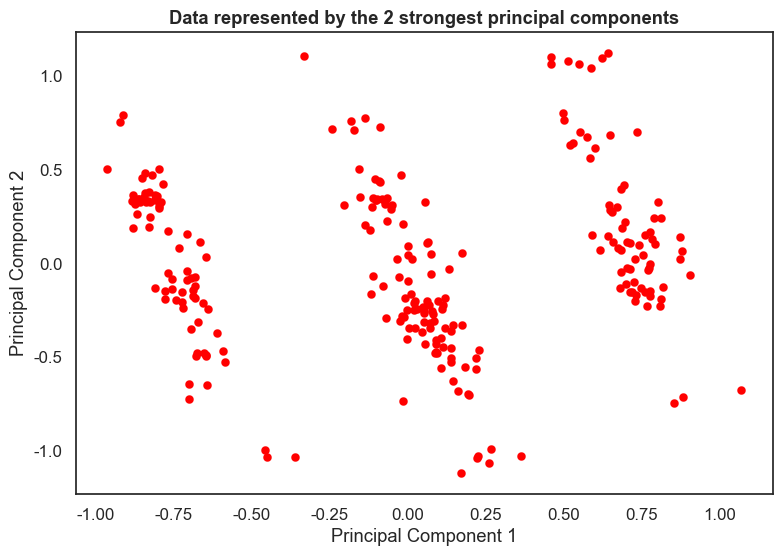

In [ ]:
sb.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()


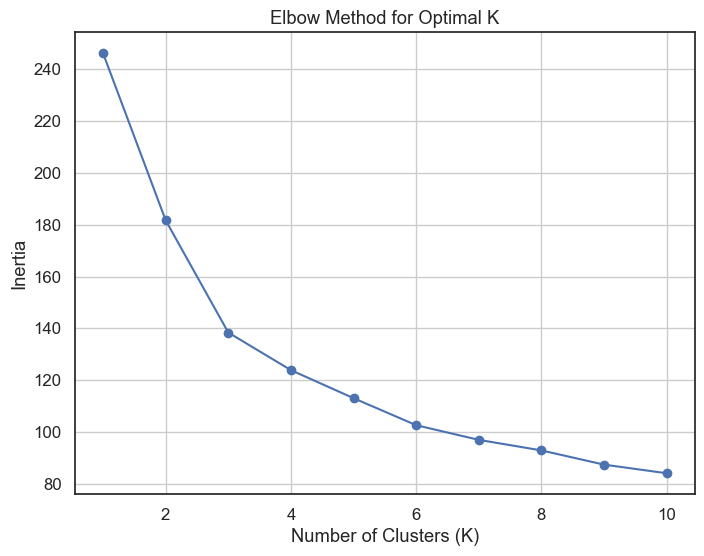

In [ ]:
inertia = []

# Define the range of K values to test
k_range = range(1, 11)  # You can adjust this range based on your problem

# Calculate the inertia for different K values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sca_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()
plt.close()

3개의 클러스터로 구분하는 것이 적절하다고 판단할 수 있다.

In [ ]:
sca_df

,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),도로율,노인_per,장애인_per,기초생활수급자_per,추정면적당시우량(연간),AREA,도로_건물_면적_m²,GREEN_AREA(㎡),도로_건물_면적_비율,녹지_면적_비율,FREQUENCY
0,0.652019,1.0,0.0,0.082400,0.153404,0.412559,0.227698,0.025486,0.167128,0.162254,0.147864,0.089157,0.115091,0.029934,0.079469,0.025123,0.001138
1,0.841125,0.0,0.0,0.164801,0.304146,0.659459,0.227698,0.025486,0.167128,0.162254,0.147864,0.058635,0.042264,0.062679,0.053593,0.073181,0.011377
2,0.678012,0.0,0.0,0.255864,0.582485,0.457102,0.227698,0.025486,0.167128,0.162254,0.147864,0.072289,0.058037,0.056252,0.055858,0.055809,0.015927
3,0.686136,0.0,0.0,0.228027,0.335382,0.634665,0.347494,0.498653,0.627517,0.293673,0.466808,0.013655,0.190557,0.000196,0.418316,0.001371,0.020478
4,0.607824,1.0,0.0,0.205789,0.132396,0.210802,0.417162,0.446370,0.730774,0.662202,0.816063,0.183936,0.085217,0.010740,0.031786,0.004816,0.062571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.927232,1.0,0.0,0.407131,0.213153,0.285977,0.000000,0.457955,0.450709,0.362500,0.355019,0.146988,0.116565,0.030817,0.051248,0.016791,0.005688
262,0.201420,1.0,0.0,0.087065,0.158519,0.832432,0.118946,0.720071,0.644448,0.556509,1.000000,0.008032,0.223005,0.295306,0.583430,1.000000,0.000000
263,0.935083,1.0,0.0,0.932836,0.305960,0.360139,0.448598,0.574900,0.620578,0.551304,0.616442,0.042570,0.084587,0.021663,0.111362,0.032214,0.001138
264,0.825656,1.0,0.0,0.481965,0.210900,0.121834,0.118946,0.720071,0.644448,0.556509,1.000000,0.048996,0.063458,0.014138,0.081101,0.019136,0.000000


In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
inertia = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(sca_df)
    inertia.append(kmeans.inertia_)

In [ ]:
silhouette = {}
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=100,
               max_iter=500,
               random_state=17)
    kmeans.fit(sca_df)
    silhouette[i] = silhouette_score(sca_df, kmeans.labels_, metric='euclidean')

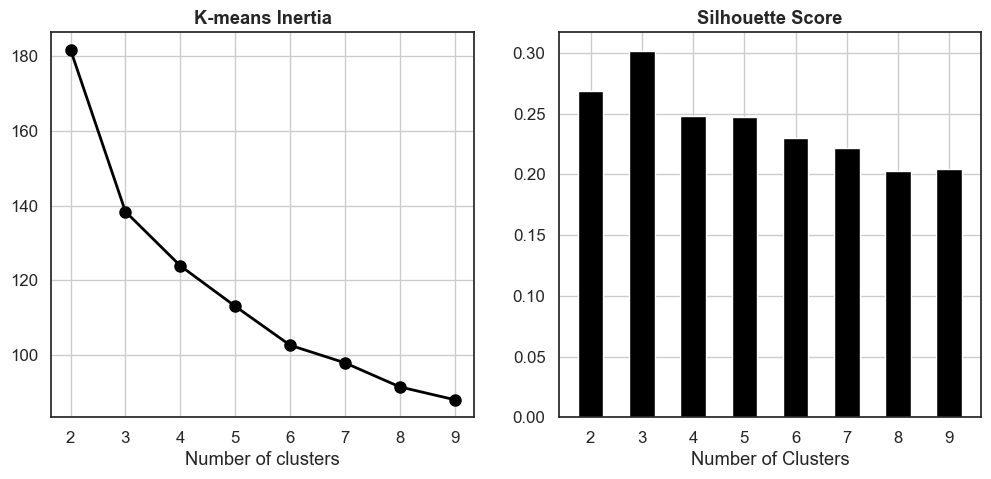

In [ ]:
sb.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='black')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'black',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()  
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(sca_df[['배수등급양호비율', '제방', '수문', '평균경사도(%)', '하천까지의거리(중심)', '인구밀도(명/km²)'
       , '도로율', '노인_per', '장애인_per', '기초생활수급자_per', '추정면적당시우량(연간)', 'FREQUENCY']])
y

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0,
       1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 1, 2,
       0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2,
       1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 1,
       0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1,
       2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1])

In [ ]:
pca_score = pca.transform(sca_df)

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(pca_score)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts() 

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


1    103
2     73
0     71
Name: count, dtype: int64

In [ ]:
df_pca_kmeans = pd.concat([sca_df, pd.DataFrame({"Segment K-means PCA":kmeans_labels})],axis=1)
df_pca_kmeans.drop(['FREQUENCY'],axis=1)
df_pca_kmeans["FREQUENCY"] = data["FREQUENCY"]

In [ ]:
df_pca_kmeans = df_pca_kmeans.dropna()

In [ ]:
df_pca_kmeans.groupby('Segment K-means PCA')["FREQUENCY"].median()

Segment K-means PCA
0.0     8.5
1.0     6.0
2.0    11.5
Name: FREQUENCY, dtype: float64

In [ ]:
df_pca_kmeans

,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),도로율,노인_per,장애인_per,기초생활수급자_per,추정면적당시우량(연간),AREA,도로_건물_면적_m²,GREEN_AREA(㎡),도로_건물_면적_비율,녹지_면적_비율,FREQUENCY,Segment K-means PCA
0,0.652019,1.0,0.0,0.082400,0.153404,0.412559,0.227698,0.025486,0.167128,0.162254,0.147864,0.089157,0.115091,0.029934,0.079469,0.025123,2,1.0
1,0.841125,0.0,0.0,0.164801,0.304146,0.659459,0.227698,0.025486,0.167128,0.162254,0.147864,0.058635,0.042264,0.062679,0.053593,0.073181,11,2.0
2,0.678012,0.0,0.0,0.255864,0.582485,0.457102,0.227698,0.025486,0.167128,0.162254,0.147864,0.072289,0.058037,0.056252,0.055858,0.055809,15,2.0
3,0.686136,0.0,0.0,0.228027,0.335382,0.634665,0.347494,0.498653,0.627517,0.293673,0.466808,0.013655,0.190557,0.000196,0.418316,0.001371,19,2.0
4,0.607824,1.0,0.0,0.205789,0.132396,0.210802,0.417162,0.446370,0.730774,0.662202,0.816063,0.183936,0.085217,0.010740,0.031786,0.004816,56,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.878035,1.0,1.0,0.174129,0.127070,0.550324,0.549703,0.803068,0.696303,0.545200,0.309631,0.065863,0.044640,0.068032,0.050499,0.072591,6,2.0
241,0.949967,1.0,1.0,0.346704,0.119667,0.404233,0.549703,0.803068,0.696303,0.545200,0.309631,0.035341,0.129307,0.105358,0.178141,0.176004,8,1.0
242,0.306061,1.0,0.0,0.213516,0.257789,0.695067,0.549703,0.803068,0.696303,0.545200,0.309631,0.037751,0.134386,0.019579,0.175976,0.031658,5,1.0
243,0.815764,1.0,0.0,0.186567,0.088993,0.348521,0.313509,0.640394,0.494446,0.318602,0.213761,0.006426,0.203149,0.207337,0.571893,0.747734,2,1.0


In [ ]:
centroids_pca[:,1]

array([0.60049958, 0.4469857 , 0.7018899 ])

In [ ]:
len(df_pca_kmeans)

229

In [56]:
sb.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)
x_axis = pca_2_result[:, 0]
y_axis =pca_2_result[:, 1]
sb.scatterplot(x=x_axis, y=y_axis, hue=df_pca_kmeans["Segment K-means PCA"], palette='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()


NameError: name 'sb' is not defined

In [ ]:
sca_df

,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),1분위소득가구비율(%),2분위소득가구비율(%),3분위소득가구비율(%),4분위소득가구비율(%),5분위소득가구비율(%),도로율,노인_per,장애인_per,기초생활수급자_per,추정면적당시우량(연간),FREQUENCY
0,0.652019,1.0,0.0,0.082400,0.153404,0.396933,0.075859,0.173948,0.421812,0.703835,0.614029,0.227698,0.025486,0.167128,0.162254,0.147864,0.001138
1,0.841125,0.0,0.0,0.164801,0.304146,0.650401,0.226233,0.303176,0.577498,0.811196,0.411324,0.227698,0.025486,0.167128,0.162254,0.147864,0.011377
2,0.678012,0.0,0.0,0.255864,0.582485,0.442661,0.232434,0.384465,0.719249,0.768676,0.344182,0.227698,0.025486,0.167128,0.162254,0.147864,0.015927
3,0.686136,0.0,0.0,0.228027,0.335382,0.624947,1.000000,0.719271,0.512024,0.128854,0.015338,0.347494,0.498653,0.627517,0.293673,0.466808,0.020478
4,0.607824,1.0,0.0,0.205789,0.132396,0.189810,0.532695,0.668979,1.000000,0.283669,0.114052,0.417162,0.446370,0.730774,0.662202,0.816063,0.062571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.927232,1.0,0.0,0.407131,0.213153,0.266984,0.524442,0.521793,0.689787,0.646000,0.168323,0.000000,0.457955,0.450709,0.362500,0.355019,0.005688
261,0.201420,1.0,0.0,0.087065,0.158519,0.827975,0.494297,0.505086,0.838754,0.540355,0.183280,0.118946,0.720071,0.644448,0.556509,1.000000,0.000000
262,0.935083,1.0,0.0,0.932836,0.305960,0.343119,0.882015,0.695723,0.695383,0.077379,0.054817,0.448598,0.574900,0.620578,0.551304,0.616442,0.001138
263,0.825656,1.0,0.0,0.481965,0.210900,0.098475,0.652988,0.419857,0.530795,0.245377,0.302099,0.118946,0.720071,0.644448,0.556509,1.000000,0.000000


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors # 차이: KNN 지도학습 <-> NearestNeighbors 비지도학습
from itertools import combinations, product


In [ ]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(sca_df)
distances, indices = neighbors_fit.kneighbors(sca_df)
s_distances = np.sort(distances, axis=0)

In [ ]:
target = s_distances[:,1]
target


array([0.1335177 , 0.1335177 , 0.13980291, 0.13980291, 0.15832003,
       0.15832003, 0.16789224, 0.16789224, 0.17119197, 0.17714398,
       0.17714398, 0.17863837, 0.18714645, 0.18714645, 0.19249335,
       0.1925345 , 0.1925345 , 0.19796373, 0.19796373, 0.20248441,
       0.20248441, 0.21242339, 0.21242339, 0.21803774, 0.21803774,
       0.22291847, 0.22291847, 0.23828416, 0.25080325, 0.25080325,
       0.25092558, 0.25092558, 0.2618844 , 0.26282491, 0.26282491,
       0.27084962, 0.27084962, 0.27353177, 0.28728608, 0.28728608,
       0.29133907, 0.29177499, 0.29177499, 0.29517857, 0.29517857,
       0.29978076, 0.30209791, 0.30209791, 0.30699317, 0.31315841,
       0.31315841, 0.314611  , 0.314611  , 0.32230952, 0.32230952,
       0.3229952 , 0.3229952 , 0.32779186, 0.32779186, 0.33283209,
       0.33283209, 0.33454278, 0.33454278, 0.33780604, 0.33780604,
       0.34227064, 0.34227064, 0.34480645, 0.34602004, 0.34602004,
       0.34706487, 0.34706487, 0.34719843, 0.34829855, 0.35217

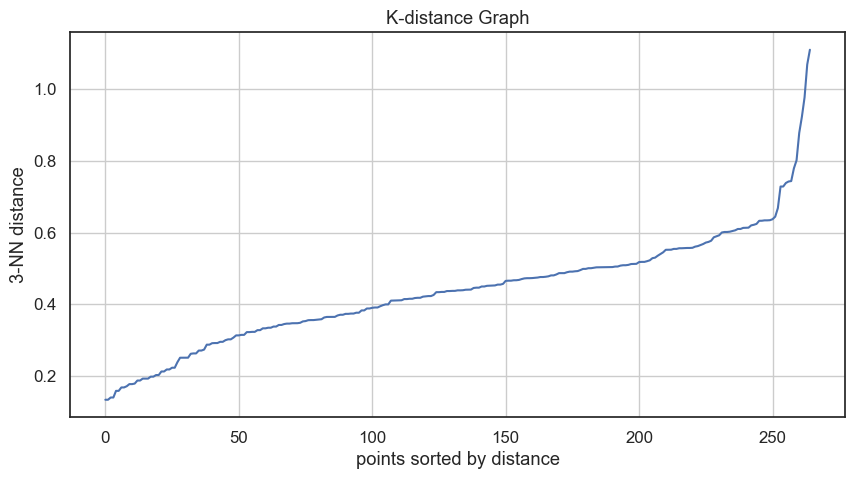

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(target)
plt.grid()
plt.title('K-distance Graph')
plt.ylabel("3-NN distance")
plt.xlabel("points sorted by distance")
plt.show()
plt.close()

In [ ]:
eps = [0.7,0.75]
minPts = [5, 6]

In [ ]:
prod = list(product(*[eps, minPts]))
prod


[(0.7, 5), (0.7, 6), (0.75, 5), (0.75, 6)]

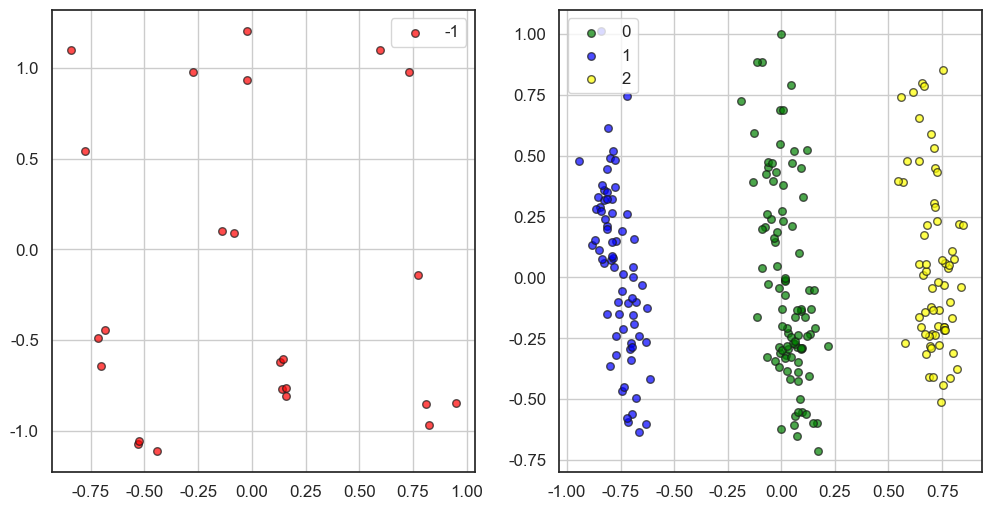

In [ ]:

# Initialize the DBSCAN model
model = DBSCAN(eps=0.7, min_samples=5)

# Fit the model to the data and get the cluster labels
predict = pd.DataFrame(model.fit_predict(pca_score))
predict.columns = ['predict']


# Concatenate the cluster labels with your data
r = pd.concat([sca_df, predict], axis=1)
r["x_axis"] = x_axis
r['y_axis'] = y_axis
# Define unique colors for each cluster label
label_colors = {-1: 'red', 0: 'green', 1: 'blue', 2: 'yellow'}

# Create subplots for scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Iterate through cluster labels and plot data points with unique colors
for label, color in label_colors.items():
    if label == -1:
        ax1.scatter(r[r['predict'] == label]['x_axis'], r[r['predict'] == label]['y_axis'], label=label, c=color, s=30, edgecolors='k', alpha=0.7)
    else:
        ax2.scatter(r[r['predict'] == label]['x_axis'], r[r['predict'] == label]['y_axis'], label=label, c=color, s=30, edgecolors='k', alpha=0.7)

# Add legends and grids to the subplots
ax1.legend()
ax2.legend()
ax1.grid()
ax2.grid()

# Show the scatter plots
plt.show()


In [ ]:
import pandas as pd

def process_cluster_label(data, cluster_label):
    # Filter data for the specified cluster label
    cluster_data = data[data['predict'] == cluster_label]

    # Drop unnecessary columns
    cluster_data = cluster_data.drop(['FREQUENCY', 'predict', 'x_axis', 'y_axis'], axis=1)

    # Add the 'FREQUENCY' column from the original data
    cluster_data = cluster_data.merge(data[['FREQUENCY']], left_index=True, right_index=True)


    return cluster_data

r_group = {}
for i in range(0,3):
    r_group[i] = process_cluster_label(r, i)

NameError: name 'r' is not defined

In [ ]:
def backward_elimination(X, y):
    included = list(X.columns)
    
    while True:
        model = sm.OLS(endog=y, exog=X[included]).fit()
        rsquard_adj = model.rsquared_adj
        worst_feature = None
        changed=False
        
        for feature in included:
            droped_feature=[x for x in included if x!=feature]
            droped_model=sm.OLS(endog=y, exog=X[droped_feature]).fit()
            if droped_model.rsquared_adj > rsquard_adj:
                #print(droped_model.rsquared_adj,rsquard_adj)
                worst_feature = feature
                break
        #print(included)
        if worst_feature:
            included.remove(worst_feature)
            changed = True
        
        if not changed:
            break
    
    model = sm.OLS(y,X[included]).fit()
    return model #, included, rsquard_adj

In [ ]:
r_group[0]["침수횟수"] = data["침수횟수"]
r_group[1]["침수횟수"] = data["침수횟수"]

In [ ]:
data[data["FREQUENCY"] == 527] 

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),1분위소득가구비율(%),2분위소득가구비율(%),...,4분위소득가구비율(%),5분위소득가구비율(%),도로율,노인_per,장애인_per,기초생활수급자_per,기초생활수급자+65세이상_per,추정면적당시우량(연간),침수여부,FREQUENCY
42,영등포구,대림1동,0.694118,0.0,0.0,8.0,706.587694,33404.08163,0.330179,0.266939,...,0.147989,0.072489,29.23,15.888026,3.889959,3.044485,1.321272,0.355214,1.0,527


(array([75.,  7.,  5.,  3.,  1.,  0.,  2.,  0.,  0.,  2.]),
 array([  1. ,  24.2,  47.4,  70.6,  93.8, 117. , 140.2, 163.4, 186.6,
        209.8, 233. ]),
 <BarContainer object of 10 artists>)

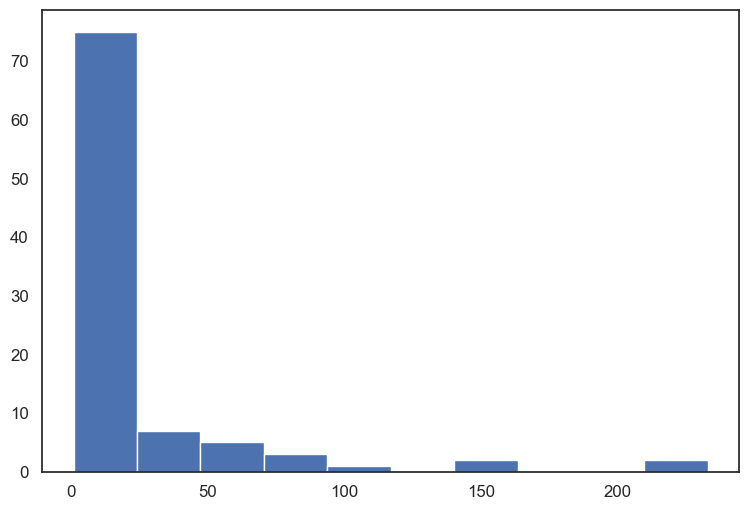

In [ ]:
plt.hist(x=r_group[0]['FREQUENCY'])

(array([48., 14.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([  1. ,  53.6, 106.2, 158.8, 211.4, 264. , 316.6, 369.2, 421.8,
        474.4, 527. ]),
 <BarContainer object of 10 artists>)

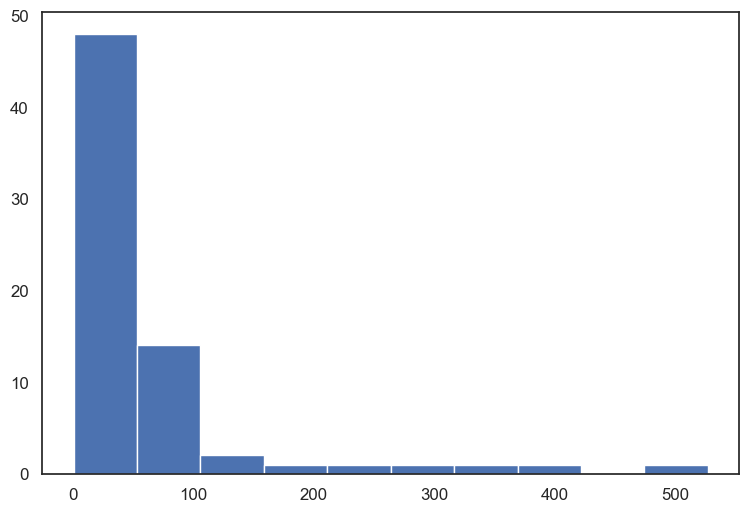

In [ ]:
plt.hist(r_group[1]["FREQUENCY"])

In [ ]:
plt.hist(r_group[2]["FREQUENCY"], range=)

SyntaxError: invalid syntax (4116818637.py, line 1)

In [ ]:
model_0 = backward_elimination(r_group[0].drop(['FREQUENCY'],axis=1),r_group[0]["FREQUENCY"])
model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              FREQUENCY   R-squared (uncentered):                   0.362
Model:                            OLS   Adj. R-squared (uncentered):              0.303
Method:                 Least Squares   F-statistic:                              6.158
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                    2.79e-06
Time:                        11:56:36   Log-Likelihood:                         -479.06
No. Observations:                  95   AIC:                                      974.1
Df Residuals:                      87   BIC:                                      994.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
배수등급양호비율       -19.0375     13.958     -1.364      0.176     -46.780       8.705
인구밀도(명/km²)     26.6341     20.322      1.311      0.193     -13.757      67.026
4분위소득가구비율(%)    30.2321     24.923      1.213      0.228     -19.304      79.769
5분위소득가구비율(%)   -31.3045     28.721     -1.090      0.279     -88.391      25.782
도로율             38.7575     14.947      2.593      0.011       9.049      68.466
장애인_per         57.0255     45.649      1.249      0.215     -33.707     147.758
기초생활수급자_per   -106.3630     38.485     -2.764      0.007    -182.855     -29.871
추정면적당시우량(연간)    31.7666     24.428      1.300      0.197     -16.787      80.320
==============================================================================
Omnibus:                       61.437   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.229
Skew:                           2.200   Prob(JB):                     7.60e-55
Kurtosis:                       9.603   Cond. No.                         20.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_1 = backward_elimination(r_group[1].drop(['FREQUENCY'],axis=1),r_group[1]["FREQUENCY"])
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              FREQUENCY   R-squared (uncentered):                   0.493
Model:                            OLS   Adj. R-squared (uncentered):              0.446
Method:                 Least Squares   F-statistic:                              10.39
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                    5.14e-08
Time:                        11:57:15   Log-Likelihood:                         -404.63
No. Observations:                  70   AIC:                                      821.3
Df Residuals:                      64   BIC:                                      834.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
하천까지의거리(중심)   -128.6922     59.162     -2.175      0.033    -246.881     -10.503
2분위소득가구비율(%)   319.2086     84.942      3.758      0.000     149.517     488.900
3분위소득가구비율(%)   -94.1792     67.355     -1.398      0.167    -228.736      40.378
도로율            109.4613     33.450      3.272      0.002      42.636     176.286
기초생활수급자_per   -174.2106     71.364     -2.441      0.017    -316.776     -31.645
추정면적당시우량(연간)    66.9905     56.006      1.196      0.236     -44.894     178.875
==============================================================================
Omnibus:                       31.248   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.671
Skew:                           1.489   Prob(JB):                     1.23e-15
Kurtosis:                       6.831   Cond. No.                         12.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_2 = backward_elimination(r_group[2].drop(['FREQUENCY'],axis=1),r_group[2]["FREQUENCY"])
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              FREQUENCY   R-squared (uncentered):                   0.447
Model:                            OLS   Adj. R-squared (uncentered):              0.400
Method:                 Least Squares   F-statistic:                              9.522
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                    1.07e-06
Time:                        11:57:34   Log-Likelihood:                         -307.31
No. Observations:                  64   AIC:                                      624.6
Df Residuals:                      59   BIC:                                      635.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
2분위소득가구비율(%)    67.7951     16.123      4.205      0.000      35.534     100.056
5분위소득가구비율(%)    39.3820     23.671      1.664      0.101      -7.983      86.747
도로율            -56.3398     19.097     -2.950      0.005     -94.553     -18.127
노인_per         -25.8280     19.641     -1.315      0.194     -65.129      13.473
추정면적당시우량(연간)    48.5548     23.547      2.062      0.044       1.438      95.672
==============================================================================
Omnibus:                       56.868   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.409
Skew:                           2.574   Prob(JB):                     5.26e-64
Kurtosis:                      12.099   Cond. No.                         7.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sca_df['label'] = y

In [ ]:
group_0 = df_pca_kmeans[df_pca_kmeans['Segment K-means PCA'] == 0]  
group_1 = df_pca_kmeans[df_pca_kmeans['Segment K-means PCA'] == 1]  
group_2 = df_pca_kmeans[df_pca_kmeans['Segment K-means PCA'] == 2]  

In [ ]:
group_1

,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),1분위소득가구비율(%),2분위소득가구비율(%),3분위소득가구비율(%),4분위소득가구비율(%),5분위소득가구비율(%),도로율,노인_per,장애인_per,기초생활수급자_per,추정면적당시우량(연간),FREQUENCY,Segment K-means PCA
0,0.652019,1.0,0.0,0.082400,0.153404,0.396933,0.075859,0.173948,0.421812,0.703835,0.614029,0.227698,0.025486,0.167128,0.162254,0.147864,2,1
4,0.607824,1.0,0.0,0.205789,0.132396,0.189810,0.532695,0.668979,1.000000,0.283669,0.114052,0.417162,0.446370,0.730774,0.662202,0.816063,56,1
5,0.674044,1.0,0.0,0.230100,0.054973,0.127804,0.461881,0.380115,0.853267,0.616177,0.235035,0.313509,0.640394,0.494446,0.318602,0.213761,1,1
6,0.862398,1.0,0.0,0.471600,0.471093,0.299372,0.398894,0.506262,0.920800,0.690689,0.169481,0.397621,0.551421,0.628180,0.604230,0.166993,3,1
7,0.862052,1.0,0.0,0.446630,0.286012,0.575878,0.338395,0.456014,0.916666,0.778313,0.201801,0.397621,0.551421,0.628180,0.604230,0.166993,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.942502,1.0,0.0,0.182421,0.236633,0.332303,0.725556,0.603638,0.763346,0.297698,0.102278,0.313509,0.640394,0.494446,0.318602,0.213761,1,1
260,0.927232,1.0,0.0,0.407131,0.213153,0.266984,0.524442,0.521793,0.689787,0.646000,0.168323,0.000000,0.457955,0.450709,0.362500,0.355019,6,1
261,0.201420,1.0,0.0,0.087065,0.158519,0.827975,0.494297,0.505086,0.838754,0.540355,0.183280,0.118946,0.720071,0.644448,0.556509,1.000000,1,1
262,0.935083,1.0,0.0,0.932836,0.305960,0.343119,0.882015,0.695723,0.695383,0.077379,0.054817,0.448598,0.574900,0.620578,0.551304,0.616442,2,1


### 클러스터 별 RandomForest분석으로 Feature Importance 확인

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(group_0.drop(['FREQUENCY'],axis=1), group_0['FREQUENCY'])

# Extract feature importance scores
feature_importance = clf.feature_importances_

# Map feature importance scores to feature names (if available)
feature_names = group_0.drop(["FREQUENCY"],axis=1).columns
feature_importance_mapping = dict(zip(feature_names, feature_importance))

# Sort and print feature importance
sorted_feature_importance = sorted(feature_importance_mapping.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: 노인_per, Importance: 0.13893951166678437
Feature: 평균경사도(%), Importance: 0.11432267337405687
Feature: 4분위소득가구비율(%), Importance: 0.10769230769230767
Feature: 도로율, Importance: 0.09591567852437417
Feature: 배수등급양호비율, Importance: 0.09241410763149888
Feature: 3분위소득가구비율(%), Importance: 0.09099399795051973
Feature: 2분위소득가구비율(%), Importance: 0.08848365073661514
Feature: 5분위소득가구비율(%), Importance: 0.06539705353934602
Feature: 1분위소득가구비율(%), Importance: 0.06409749670619234
Feature: 인구밀도(명/km²), Importance: 0.04907773386034256
Feature: 기초생활수급자_per, Importance: 0.04150197628458497
Feature: 장애인_per, Importance: 0.037329819938515585
Feature: 추정면적당시우량(연간), Importance: 0.013833992094861658
Feature: 제방, Importance: 0.0
Feature: 수문, Importance: 0.0
Feature: 하천까지의거리(중심), Importance: 0.0
Feature: Segment K-means PCA, Importance: 0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(group_1.drop(['FREQUENCY'],axis=1), group_1['FREQUENCY'])

# Extract feature importance scores
feature_importance = clf.feature_importances_

# Map feature importance scores to feature names (if available)
feature_names = group_1.drop(["FREQUENCY"],axis=1).columns
feature_importance_mapping = dict(zip(feature_names, feature_importance))

# Sort and print feature importance
sorted_feature_importance = sorted(feature_importance_mapping.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: 인구밀도(명/km²), Importance: 0.14787660649273549
Feature: 평균경사도(%), Importance: 0.12159084658122006
Feature: 4분위소득가구비율(%), Importance: 0.10768031035760771
Feature: 3분위소득가구비율(%), Importance: 0.10662553431075938
Feature: 5분위소득가구비율(%), Importance: 0.09606438731348754
Feature: 1분위소득가구비율(%), Importance: 0.06911271247043291
Feature: 추정면적당시우량(연간), Importance: 0.06807669159307923
Feature: 기초생활수급자_per, Importance: 0.06163705374333022
Feature: 노인_per, Importance: 0.05961078975190274
Feature: 배수등급양호비율, Importance: 0.05676879916387041
Feature: 2분위소득가구비율(%), Importance: 0.043319214478244134
Feature: 장애인_per, Importance: 0.030447219318994447
Feature: 하천까지의거리(중심), Importance: 0.02079322294955718
Feature: 도로율, Importance: 0.01039661147477859
Feature: 제방, Importance: 0.0
Feature: 수문, Importance: 0.0
Feature: Segment K-means PCA, Importance: 0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(group_2.drop(['FREQUENCY'],axis=1), group_2['FREQUENCY'])

# Extract feature importance scores
feature_importance = clf.feature_importances_

# Map feature importance scores to feature names (if available)
feature_names = group_2.drop(["FREQUENCY"],axis=1).columns
feature_importance_mapping = dict(zip(feature_names, feature_importance))

# Sort and print feature importance
sorted_feature_importance = sorted(feature_importance_mapping.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: 3분위소득가구비율(%), Importance: 0.1628233342901795
Feature: 1분위소득가구비율(%), Importance: 0.11565014495418899
Feature: 인구밀도(명/km²), Importance: 0.10911246142324506
Feature: 배수등급양호비율, Importance: 0.08324562242847573
Feature: 5분위소득가구비율(%), Importance: 0.08107677096290625
Feature: 평균경사도(%), Importance: 0.07651226003536787
Feature: 2분위소득가구비율(%), Importance: 0.07144451886581825
Feature: 기초생활수급자_per, Importance: 0.06944749076246458
Feature: 하천까지의거리(중심), Importance: 0.06315185149746434
Feature: 노인_per, Importance: 0.0627297134526952
Feature: 4분위소득가구비율(%), Importance: 0.0334896182183523
Feature: 장애인_per, Importance: 0.031894874493668866
Feature: 도로율, Importance: 0.02602549132783203
Feature: 추정면적당시우량(연간), Importance: 0.013395847287340923
Feature: 제방, Importance: 0.0
Feature: 수문, Importance: 0.0
Feature: Segment K-means PCA, Importance: 0.0


In [ ]:
regression_models["group_0"].summary()

NameError: name 'regression_models' is not defined

In [ ]:
regression_models["group_1"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              FREQUENCY   R-squared (uncentered):                   0.376
Model:                            OLS   Adj. R-squared (uncentered):              0.334
Method:                 Least Squares   F-statistic:                              9.039
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                    9.30e-07
Time:                        11:10:47   Log-Likelihood:                         -465.92
No. Observations:                  80   AIC:                                      941.8
Df Residuals:                      75   BIC:                                      953.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
하천까지의거리(중심)   -85.0817     49.686     -1.712      0.091    -184.061      13.897
인구밀도(명/km²)    72.8045     41.654      1.748      0.085     -10.175     155.784
도로율           117.4071     32.509      3.612      0.001      52.647     182.167
노인_per        132.5406     65.143      2.035      0.045       2.768     262.313
기초생활수급자_per  -145.2207     70.621     -2.056      0.043    -285.906      -4.536
==============================================================================
Omnibus:                       50.191   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.689
Skew:                           2.060   Prob(JB):                     1.42e-37
Kurtosis:                       8.825   Cond. No.                         9.88
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
regression_models["group_2"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              FREQUENCY   R-squared (uncentered):                   0.318
Model:                            OLS   Adj. R-squared (uncentered):              0.281
Method:                 Least Squares   F-statistic:                              8.511
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                    1.08e-05
Time:                        11:10:47   Log-Likelihood:                         -385.31
No. Observations:                  77   AIC:                                      778.6
Df Residuals:                      73   BIC:                                      788.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
평균경사도(%)       35.2489     16.983      2.076      0.041       1.401      69.097
하천까지의거리(중심)    39.4243     27.145      1.452      0.151     -14.675      93.524
인구밀도(명/km²)    51.3636     17.136      2.997      0.004      17.212      85.515
기초생활수급자_per   -33.5038     15.876     -2.110      0.038     -65.144      -1.864
==============================================================================
Omnibus:                       70.448   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.506
Skew:                           2.930   Prob(JB):                     2.92e-87
Kurtosis:                      12.480   Cond. No.                         4.95
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
plt.figure(figsize=(10, 7))
tmp_x = std_x[:,:2]
for i in range(n):
    points = tmp_x[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'cluster {i+1}')

    hull = ConvexHull(points)
    vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
    plt.plot(points[vert, 0], points[vert, 1], '--', )
    plt.fill(points[vert, 0], points[vert, 1], alpha=0.2)

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='x')

plt.legend()
plt.show()
plt.close()


NameError: name 'std_x' is not defined

<Figure size 1000x700 with 0 Axes>

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [ ]:
lnk = linkage(df, method='ward', metric = 'euclidean')
lnk

array([[4.70000000e+01, 2.01000000e+02, 1.86178004e+01, 2.00000000e+00],
       [1.67000000e+02, 2.36000000e+02, 2.76427472e+01, 2.00000000e+00],
       [2.09000000e+02, 2.38000000e+02, 3.40649049e+01, 2.00000000e+00],
       ...,
       [5.21000000e+02, 5.22000000e+02, 6.03660300e+04, 9.40000000e+01],
       [5.24000000e+02, 5.25000000e+02, 1.00566033e+05, 1.71000000e+02],
       [5.26000000e+02, 5.27000000e+02, 2.07430235e+05, 2.65000000e+02]])